In [1]:
import numpy as np
from scipy.linalg import expm
import random
import matplotlib.pyplot as plt
# Define basic quantum gates
def I(): return np.array([[1, 0], [0, 1]])
def H(): return (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
def X(): return np.array([[0, 1], [1, 0]])
def Z(): return np.array([[1, 0], [0, -1]])

def CNOT():
    """CNOT gate for 2 qubits"""
    return np.array([[1, 0, 0, 0], 
                     [0, 1, 0, 0], 
                     [0, 0, 0, 1], 
                     [0, 0, 1, 0]])

def QFT(n):
    """Quantum Fourier Transform on n qubits."""
    N = 2**n
    omega = np.exp(2j * np.pi / N)
    return np.array([[omega**(i*j) for j in range(N)] for i in range(N)]) / np.sqrt(N)

def modular_exponentiation(x, a, N, num_qubits):
    """Implements modular exponentiation |a⟩ → |x^a mod N⟩."""
    state_size = 2**num_qubits
    U = np.zeros((state_size, state_size), dtype=complex)

    # Ensure unitary transformation
    for i in range(state_size):
        mod_result = pow(x, i, N)  # Compute x^i mod N
        U[i, mod_result] = 1

    return U

def apply_hadamard(state, num_qubits):
    """Applies Hadamard to all qubits."""
    H_n = H()
    for _ in range(num_qubits - 1):
        H_n = np.kron(H_n, H())  
    return H_n @ state

def measure(state):
    """Simulate quantum measurement."""
    probabilities = np.abs(state) ** 2
    probabilities /= np.sum(probabilities)  # Ensure valid probabilities
    measured_value = np.random.choice(len(state), p=probabilities)
    return measured_value

# Number to factor
N = 15  

def shor_algorithm(N):
    """Simulate Shor's Algorithm using matrix operations."""
    num_qubits = 8  # Choose enough qubits
    state_size = 2**num_qubits
    state = np.zeros(state_size, dtype=complex)
    state[0] = 1  # Initialize to |0>
    
    # Step 1: Apply Hadamard to first register
    print("Before Hadamard:", np.round(np.abs(state), 3))
    state = apply_hadamard(state, num_qubits)
    print("After Hadamard:", np.round(np.abs(state), 3))
    
    # Step 2: Modular exponentiation step
    x = random.randint(2, N - 1)  # Choose a random base
    a = random.randint(1, N - 1)  # Random exponent
    U_f = modular_exponentiation(x, a, N, num_qubits)
    state = U_f @ state
    print("After Modular Exponentiation:", np.round(np.abs(state), 3))
    
    # Step 3: Apply Quantum Fourier Transform
    QFT_n = QFT(num_qubits)
    state = QFT_n @ state
    print("After QFT:", np.round(np.abs(state), 3))

    # Normalize state before measurement
    state = state / np.linalg.norm(state)  # Normalize the quantum state
    
    # Step 4: Measurement (simulated)
    measured_value = measure(state)
    print("Measured value:", measured_value)
    
    # Step 5: Post-processing to determine period r
    r = continued_fraction(measured_value, N)

    # Step 6: Compute factors
    factor1, factor2 = compute_factors(x, r, N)

    print(f"Factors of {N}: {factor1}, {factor2}")

def continued_fraction(measured_value, N):
    """Estimate period r using continued fractions (simplified)."""
    return measured_value % N  # Placeholder: Replace with real continued fraction method

def compute_factors(x, r, N):
    """Compute possible factors using GCD."""
    if r % 2 != 0:
        return None, None  # Period must be even

    factor1 = np.gcd(x**(r//2) - 1, N)
    factor2 = np.gcd(x**(r//2) + 1, N)

    return factor1, factor2

# Run Shor's algorithm
shor_algorithm(N)


Before Hadamard: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
After Hadamard: [0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062
 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062 0.062
 0.062 0.062 0.062 0.062 0.062 0.062 0.06

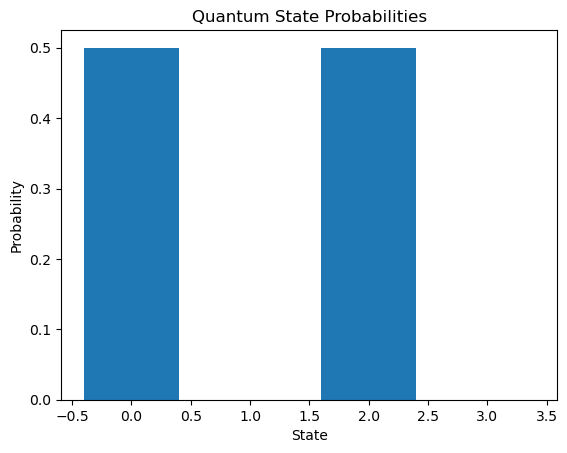

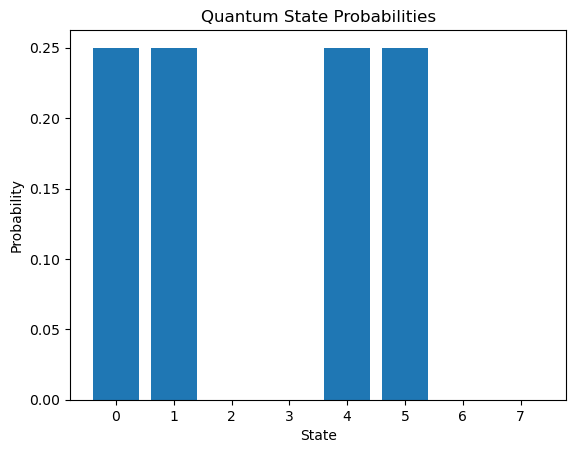

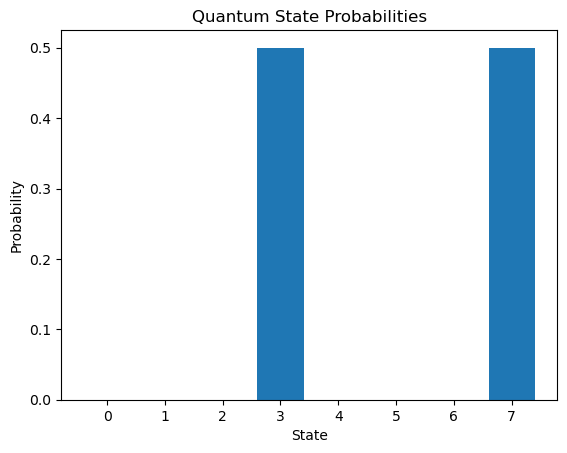

State probabilities: [0.   0.25 0.25 0.   0.   0.25 0.25 0.  ]


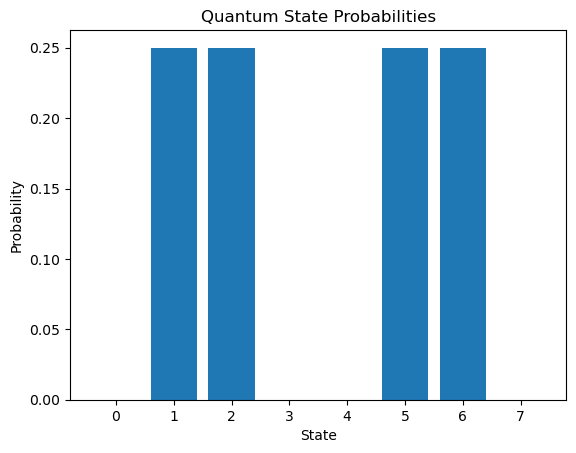

In [2]:
class qprogram:
    def __init__(self, qubits):
        """Initialize the quantum program with a given number of qubits."""
        if isinstance(qubits, int):
            self.num_qubits = qubits
            self.state = np.zeros(2**qubits, dtype=complex)
            self.state[0] = 1  # Start in |0⟩ state
        elif isinstance(qubits, list):
            self.num_qubits = len(qubits)
            self.state = np.zeros(2**self.num_qubits, dtype=complex)
            index = sum([bit * (2 ** i) for i, bit in enumerate(reversed(qubits))])
            self.state[index] = 1  # Set initial state
        else:
            raise ValueError("Invalid qubit initialization")

    def normalize(self):
        """Normalize the quantum state."""
        norm = np.linalg.norm(self.state)
        if norm > 0:
            self.state = self.state / norm

    def h(self, target):
        """Apply Hadamard gate to a specific qubit in a multi-qubit system."""
        H = (1/np.sqrt(2)) * np.array([[1, 1], [1, -1]])
        size = 2**self.num_qubits
        H_n = np.eye(size, dtype=complex)
        
        for i in range(size):
            binary = f"{i:0{self.num_qubits}b}"  # Convert to binary string
            flipped = binary[:target] + str(1 - int(binary[target])) + binary[target+1:]
            flipped_index = int(flipped, 2)
            H_n[i, i] = H[0, 0] if binary[target] == '0' else H[1, 0]
            H_n[i, flipped_index] = H[0, 1] if binary[target] == '0' else H[1, 1]
            
        self.state = H_n @ self.state  # Apply Hadamard transformation
        self.normalize()  # Normalize after the operation

    def x(self, target):
        """Apply Pauli-X (NOT) gate to a specific qubit in a multi-qubit system."""
        size = 2**self.num_qubits
        X_n = np.eye(size, dtype=complex)
        
        for i in range(size):
            binary = f"{i:0{self.num_qubits}b}"  # Convert index to binary
            flipped = binary[:target] + str(1 - int(binary[target])) + binary[target+1:]
            flipped_index = int(flipped, 2)
            X_n[i, i] = 0  # Zero out diagonal element
            X_n[i, flipped_index] = 1  # Swap |0> ↔ |1>
            
        self.state = X_n @ self.state  # Apply Pauli-X transformation
        self.normalize()  # Normalize after the operation

    def cnot(self, control, target):
        """Apply CNOT gate with control and target qubit."""
        size = 2**self.num_qubits
        CNOT = np.eye(size, dtype=complex)

        for i in range(size):
            if ((i >> control) & 1) == 1:  # If control qubit is |1>
                target_bit = (i >> target) & 1
                flip = i ^ (1 << target)  # Flip target qubit
                CNOT[i, i] = 0
                CNOT[i, flip] = 1

        self.state = CNOT @ self.state
        self.normalize()  # Normalize after the operation

    def run(self, show_states=False, plot=False):
        """Run and optionally plot the quantum state."""
        probabilities = np.abs(self.state) ** 2
        if show_states:
            print("State probabilities:", probabilities)

        if plot:
            plt.bar(range(len(probabilities)), probabilities)
            plt.xlabel("State")
            plt.ylabel("Probability")
            plt.title("Quantum State Probabilities")
            plt.show()

# Start program with 2 qubits, all set to |0>
qp = qprogram(2)
qp.h(0)
qp.run(show_states=False, plot=True)

# Start program with 3 qubits, all set to |0>
qp = qprogram(3)
qp.h(0)
qp.h(2)
qp.run(show_states=False, plot=True)

# Start program with 3 qubits, qubit 0 |0>, qubit 1 |1>, qubit 2 |1>
qp = qprogram([0, 1, 1])
qp.h(0)
qp.run(show_states=False, plot=True)

# Start program with 3 qubits, qubit 0 |0>, qubit 1 |1>, qubit 2 |1>
qp = qprogram([0, 1, 1])
qp.h(0)
qp.h(2)
qp.x(0)
qp.cnot(0, 1)
qp.run(show_states=True, plot=True)
